# Fully Connected Experiments


## 1. Setup

In [1]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch
import torch.nn as nn
import semitorch

from collections import OrderedDict
from IPython import display
from torch.utils.data import DataLoader
from tqdm.notebook import trange

data_path = os.path.abspath("./data" if os.path.isdir("./data") else "../data")
device = "cuda" if torch.cuda.is_available() else "cpu"


def split_dataset(dataset: torch.utils.data.Dataset):
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size

    return torch.utils.data.random_split(dataset, [train_size, test_size])

[Taichi] version 1.6.0, llvm 15.0.1, commit f1c6fbbd, win, python 3.10.7
[Taichi] Starting on arch=cuda


### Load iris data
[https://www.kaggle.com/datasets/uciml/iris](https://www.kaggle.com/datasets/uciml/iris)

In [2]:
iris_df = pd.read_csv(
    os.path.join(data_path, "iris.csv"), index_col=0, dtype={"Species": "string"}
)
iris_x = torch.Tensor(iris_df.iloc[:, [0, 1, 2, 3]].to_numpy()).to(device)

iris_y = (
    iris_df["Species"]
    .map({
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2,
    }).to_numpy()
)
iris_y = torch.Tensor(iris_y).to(torch.int64).to(device)
print(f"Iris dataset: input features = {iris_x.shape[1]}, "
      f"classes = {torch.unique(iris_y).shape[0]}, "
      f"samples = {len(iris_y)}")

# normalize
torch.nn.functional.normalize(iris_x, dim=0, out=iris_x)

iris_train, iris_test = split_dataset(torch.utils.data.TensorDataset(iris_x, iris_y))

Iris dataset: input features = 4, classes = 3, samples = 150


tensor([[0.0706, 0.0927, 0.0275, 0.0115],
        [0.0678, 0.0794, 0.0275, 0.0115],
        [0.0650, 0.0847, 0.0256, 0.0115],
        [0.0636, 0.0821, 0.0295, 0.0115],
        [0.0692, 0.0953, 0.0275, 0.0115],
        [0.0747, 0.1032, 0.0334, 0.0230],
        [0.0636, 0.0900, 0.0275, 0.0173],
        [0.0692, 0.0900, 0.0295, 0.0115],
        [0.0609, 0.0768, 0.0275, 0.0115],
        [0.0678, 0.0821, 0.0295, 0.0058],
        [0.0747, 0.0979, 0.0295, 0.0115],
        [0.0664, 0.0900, 0.0315, 0.0115],
        [0.0664, 0.0794, 0.0275, 0.0058],
        [0.0595, 0.0794, 0.0216, 0.0058],
        [0.0802, 0.1059, 0.0236, 0.0115],
        [0.0789, 0.1165, 0.0295, 0.0230],
        [0.0747, 0.1032, 0.0256, 0.0230],
        [0.0706, 0.0927, 0.0275, 0.0173],
        [0.0789, 0.1006, 0.0334, 0.0173],
        [0.0706, 0.1006, 0.0295, 0.0173],
        [0.0747, 0.0900, 0.0334, 0.0115],
        [0.0706, 0.0979, 0.0295, 0.0230],
        [0.0636, 0.0953, 0.0197, 0.0115],
        [0.0706, 0.0874, 0.0334, 0

### Load heart disease data

[https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [3]:
heart_df = pd.read_csv(os.path.join(data_path, "heart.csv"))
heart_x = (torch.Tensor(heart_df.iloc[:, range(13)].to_numpy()).to(torch.float32).to(device))
heart_y = torch.Tensor(heart_df.iloc[:, -1].to_numpy()).to(torch.int64).to(device)

print(f"Heart disease dataset: input features = {heart_x.shape[1]}, "
      f"classes = {torch.unique(heart_y).shape[0]}, "
      f"samples = {len(heart_y)}")

# normalize
torch.nn.functional.normalize(heart_x, dim=0, out=heart_x)

heart_train, heart_test = split_dataset(torch.utils.data.TensorDataset(heart_x, heart_y))

Heart disease dataset: input features = 13, classes = 2, samples = 303


tensor([[0.0657, 0.0695, 0.1220,  ..., 0.0000, 0.0000, 0.0240],
        [0.0386, 0.0695, 0.0813,  ..., 0.0000, 0.0000, 0.0480],
        [0.0427, 0.0000, 0.0407,  ..., 0.0752, 0.0000, 0.0480],
        ...,
        [0.0709, 0.0695, 0.0000,  ..., 0.0376, 0.0916, 0.0720],
        [0.0594, 0.0695, 0.0000,  ..., 0.0376, 0.0458, 0.0720],
        [0.0594, 0.0000, 0.0407,  ..., 0.0376, 0.0458, 0.0480]],
       device='cuda:0')

### Load Naitzat data

[https://github.com/topnn/topnn_framework](https://github.com/topnn/topnn_framework)

In [4]:
circles_x, circles_y = torch.load(os.path.join(data_path, "naitzat", "circles_type_8.pt"))
circles_train, circles_test = split_dataset(torch.utils.data.TensorDataset(circles_x, circles_y))
print(f"Circles dataset: input features = {circles_x.shape[1]}, "
      f"classes = {torch.unique(circles_y).shape[0]}, "
      f"samples = {len(circles_y)}")

rings_x, rings_y = torch.load(os.path.join(data_path, "naitzat", "rings_9.pt"))
rings_train, rings_test = split_dataset(torch.utils.data.TensorDataset(rings_x, rings_y))
print(f"Rings dataset: input features = {rings_x.shape[1]}, "
      f"classes = {torch.unique(rings_y).shape[0]}, "
      f"samples = {len(rings_y)}")

spheres_x, spheres_y = torch.load(os.path.join(data_path, "naitzat", "spheres_9.pt"))
spheres_train, spheres_test = split_dataset(torch.utils.data.TensorDataset(spheres_x, spheres_y))
print(f"Spheres dataset: input features = {spheres_x.shape[1]}, "
      f"classes = {torch.unique(spheres_y).shape[0]}, "
      f"samples = {len(spheres_y)}")

Circles dataset: input features = 2, classes = 2, samples = 15950
Rings dataset: input features = 3, classes = 2, samples = 45000
Spheres dataset: input features = 3, classes = 2, samples = 37800


## 2. Models

In [5]:
def create_model(
        model_name: str,
        num_features: int,
        num_classes: int,
        num_layers: int = 1,
        channel_size: int = 16,
) -> nn.Sequential:
    BACKBONE_FEATURES = channel_size

    if model_name == "linear_relu":
        layers = [
                     nn.Linear(BACKBONE_FEATURES, BACKBONE_FEATURES),
                     nn.ReLU(),
                     nn.Linear(BACKBONE_FEATURES, BACKBONE_FEATURES),
                     nn.ReLU(),
                 ] * (num_layers - 1)

        backbone = nn.Sequential(
            nn.Linear(num_features, BACKBONE_FEATURES),
            nn.ReLU(),
            nn.Linear(BACKBONE_FEATURES, BACKBONE_FEATURES),
            nn.ReLU(),
            *layers,
        )
    elif model_name == "linear_maxplus":
        layers = [
                     nn.Linear(BACKBONE_FEATURES, BACKBONE_FEATURES),
                     semitorch.MaxPlus(BACKBONE_FEATURES, BACKBONE_FEATURES),
                 ] * (num_layers - 1)

        backbone = nn.Sequential(
            nn.Linear(num_features, BACKBONE_FEATURES),
            semitorch.MaxPlus(BACKBONE_FEATURES, BACKBONE_FEATURES),
            *layers,
        )
    elif model_name == "linear_minplus":
        layers = [
                     nn.Linear(BACKBONE_FEATURES, BACKBONE_FEATURES),
                     semitorch.MinPlus(BACKBONE_FEATURES, BACKBONE_FEATURES),
                 ] * (num_layers - 1)

        backbone = nn.Sequential(
            nn.Linear(num_features, BACKBONE_FEATURES),
            semitorch.MinPlus(BACKBONE_FEATURES, BACKBONE_FEATURES),
            *layers,
        )
    else:
        raise RuntimeError(f"Unknown model ({model_name})")

    head = nn.Linear(BACKBONE_FEATURES, num_classes, bias=False)
    model = nn.Sequential(OrderedDict([("backbone", backbone), ("head", head)]))

    model.name = model_name

    return model


def count_parameters(model: nn.Sequential) -> int:
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

## 3. Training

In [6]:
def accuracy(model: nn.Sequential, x: torch.Tensor, y: torch.Tensor) -> float:
    with torch.no_grad():
        yout = model(x)
        _, prediction = torch.max(yout.cpu(), dim=1)

        return (y.cpu() == prediction).sum().item() / float(y.numel())


def test(model: nn.Sequential, device: str, testloader: DataLoader) -> float:
    model.eval()
    accs = []

    with torch.no_grad():
        for x, y in testloader:
            x = x.to(device)
            accs.append(accuracy(model, x, y))

    return sum(accs) / len(accs)


def train(
        model: nn.Sequential,
        device: str,
        trainloader: DataLoader,
        testloader: DataLoader,
        optimizer: torch.optim.Optimizer,
        scheduler: torch.optim.lr_scheduler,
        loss: torch.nn.modules.loss,
        epochs: int,
) -> None:
    accs = []  # list of accuracy on the test dataset for every epoch
    trainaccs = []  # a list of the accuracies of all the training batches

    fig, ax = plt.subplots(1, 1, figsize=[6, 4])
    hdisplay = display.display("", display_id=True)

    for _ in trange(epochs):
        model.train()

        for x, y in trainloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            yout = model(x)
            _, prediction = torch.max(yout.cpu(), dim=1)
            trainaccs.append((y.cpu() == prediction).sum().item() / float(y.numel()))

            l = loss(yout, y.squeeze())
            l.backward()
            optimizer.step()
            if scheduler is not None:
                scheduler.step()

        accs.append(test(model, device, testloader))

        ax.clear()
        ax.set_xlim(0, epochs)
        ax.set_ylim(-0.02, 1.02)
        ax.plot(
            np.linspace(0, len(accs), len(trainaccs)),
            trainaccs,
            ".",
            markersize=1.5,
            markerfacecolor=(0, 0, 1, 0.3),
        )
        ax.plot(np.linspace(1, len(accs), len(accs)), accs)
        ax.text(
            0.6 * epochs,
            0.80,
            f"max test acc = {max(accs):.2%}",
            ha="center",
            fontsize=10,
        )
        hdisplay.update(fig)

        # prevents OOM when GPU memory is tight
        torch.cuda.empty_cache()
        gc.collect()


def resetmodel(model: nn.Module) -> None:
    @torch.no_grad()
    def weight_reset(m: nn.Module):
        reset_parameters = getattr(m, "reset_parameters", None)
        if callable(reset_parameters):
            m.reset_parameters()

    model.apply(fn=weight_reset)

In [7]:
iris_train_loader = DataLoader(iris_train, batch_size=8, shuffle=True)
iris_test_loader = DataLoader(iris_test, batch_size=len(iris_test), shuffle=False)

heart_train_loader = DataLoader(heart_train, batch_size=32, shuffle=True)
heart_test_loader = DataLoader(heart_test, batch_size=len(heart_test))

circles_train_loader = DataLoader(circles_train, batch_size=16, shuffle=True)
circles_test_loader = DataLoader(circles_test, batch_size=len(circles_test), shuffle=True)

rings_train_loader = DataLoader(rings_train, batch_size=16, shuffle=True)
rings_test_loader = DataLoader(rings_test, batch_size=len(rings_test), shuffle=True)

spheres_train_loader = DataLoader(spheres_train, batch_size=16, shuffle=True)
spheres_test_loader = DataLoader(spheres_test, batch_size=len(spheres_test), shuffle=True)

linear/relu model has 400 trainable parameters
linear/maxplus model has 400 trainable parameters
linear/minplus model has 400 trainable parameters


''

  0%|          | 0/40 [00:00<?, ?it/s]

''

  0%|          | 0/40 [00:00<?, ?it/s]

''

  0%|          | 0/40 [00:00<?, ?it/s]

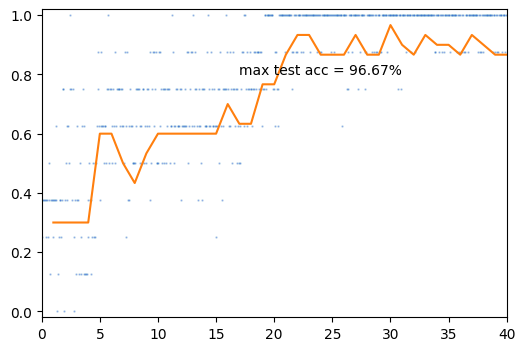

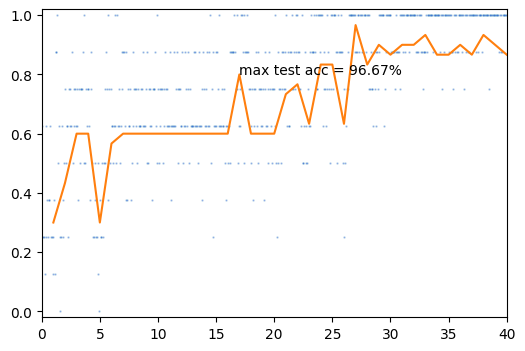

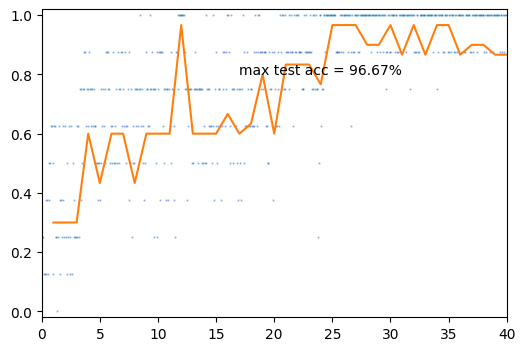

In [110]:
iris_models = [
    create_model("linear_relu", num_features=4, num_classes=3).to(device),
    create_model("linear_maxplus", num_features=4, num_classes=3).to(device),
    create_model("linear_minplus", num_features=4, num_classes=3).to(device),
]

for model in iris_models:
    model_ref = model.name.replace("_", "/")
    print(f"{model_ref} model has {count_parameters(model)} trainable parameters")

loss = nn.CrossEntropyLoss()
epochs = 40

for model in iris_models:
    if model.name == "linear_relu":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(iris_train),
            epochs=epochs,
        )
    elif model.name == "linear_maxplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(iris_train),
            epochs=epochs,
        )
    elif model.name == "linear_minplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(iris_train),
            epochs=epochs,
        )
    else:
        raise RuntimeError(f"Unknown model ({model.name})")

    train(
        model,
        device,
        iris_train_loader,
        iris_test_loader,
        optimizer,
        scheduler,
        loss,
        epochs,
    )

linear/relu model has 1232 trainable parameters
linear/maxplus model has 1232 trainable parameters
linear/minplus model has 1232 trainable parameters


''

  0%|          | 0/40 [00:00<?, ?it/s]

''

  0%|          | 0/40 [00:00<?, ?it/s]

''

  0%|          | 0/40 [00:00<?, ?it/s]

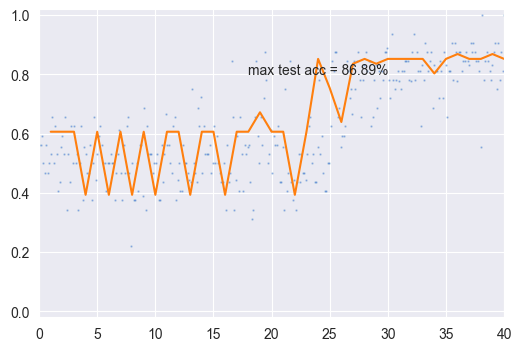

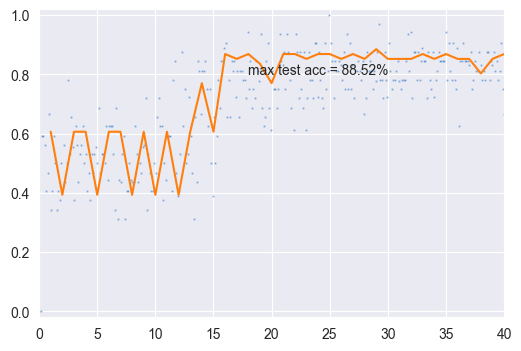

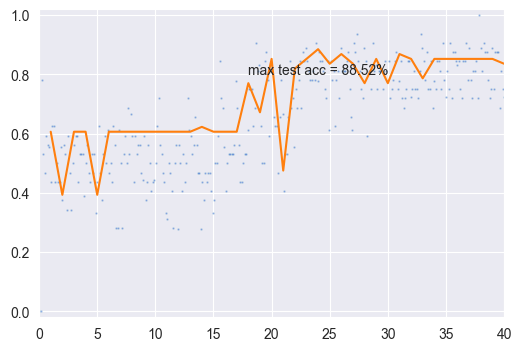

In [8]:
heart_models = [
    create_model("linear_relu", num_features=13, num_classes=12, num_layers=2).to(device),
    create_model("linear_maxplus", num_features=13, num_classes=12, num_layers=2).to(device),
    create_model("linear_minplus", num_features=13, num_classes=12, num_layers=2).to(device),
]

for model in heart_models:
    model_ref = model.name.replace("_", "/")
    print(f"{model_ref} model has {count_parameters(model)} trainable parameters")

loss = nn.CrossEntropyLoss()
epochs = 40

for model in heart_models:
    if model.name == "linear_relu":
        optimizer = torch.optim.AdamW(model.parameters(), lr=6e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=6e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_maxplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=8e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=8e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_minplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=8e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=8e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    else:
        raise RuntimeError(f"Unknown model ({model.name})")

    train(
        model,
        device,
        heart_train_loader,
        heart_test_loader,
        optimizer,
        scheduler,
        loss,
        epochs,
    )

linear/relu model has 18 parameters
linear/maxplus model has 18 parameters
linear/minplus model has 18 parameters


''

  0%|          | 0/10 [00:00<?, ?it/s]

''

  0%|          | 0/10 [00:00<?, ?it/s]

''

  0%|          | 0/10 [00:00<?, ?it/s]

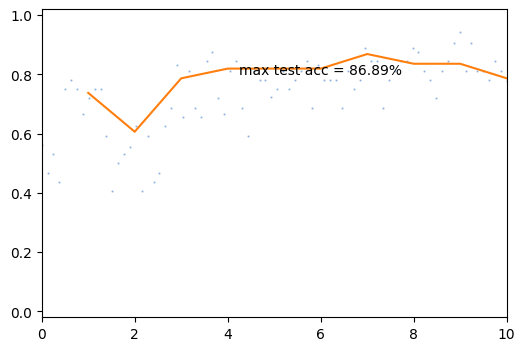

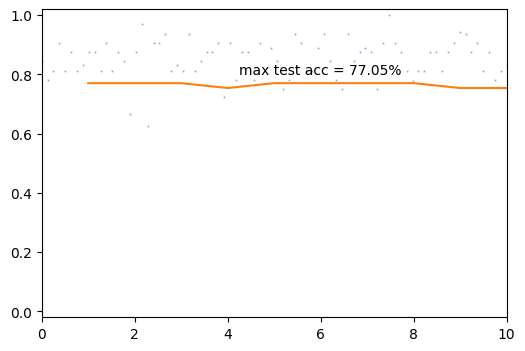

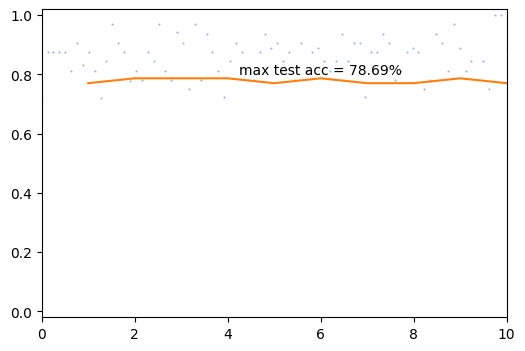

In [112]:
circles_models = [
    create_model("linear_relu", num_features=2, num_classes=3, channel_size=2).to(device),
    create_model("linear_maxplus", num_features=2, num_classes=3, channel_size=2).to(device),
    create_model("linear_minplus", num_features=2, num_classes=3, channel_size=2).to(device),
]

for model in circles_models:
    model_ref = model.name.replace("_", "/")
    print(f"{model_ref} model has {count_parameters(model)} parameters")

loss = nn.CrossEntropyLoss()
epochs = 10

for model in heart_models:
    if model.name == "linear_relu":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_maxplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_minplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    else:
        raise RuntimeError(f"Unknown model ({model.name})")

    train(
        model,
        device,
        heart_train_loader,
        heart_test_loader,
        optimizer,
        scheduler,
        loss,
        epochs,
    )

linear/relu model has 18 parameters
linear/maxplus model has 18 parameters
linear/minplus model has 18 parameters


''

  0%|          | 0/20 [00:00<?, ?it/s]

''

  0%|          | 0/20 [00:00<?, ?it/s]

''

  0%|          | 0/20 [00:00<?, ?it/s]

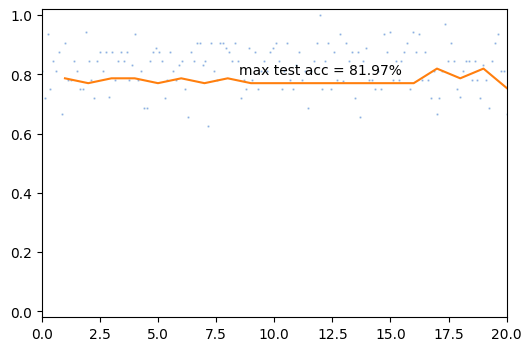

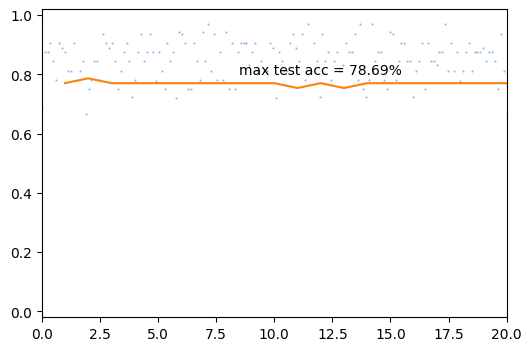

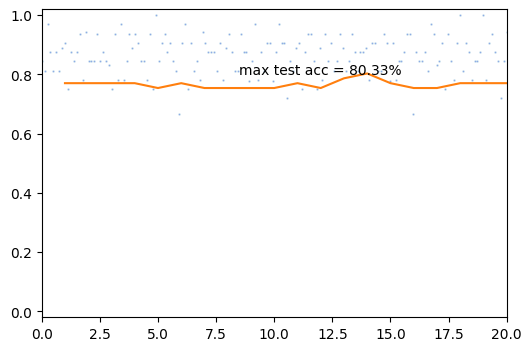

In [113]:
rings_models = [
    create_model("linear_relu", num_features=3, num_classes=2, channel_size=2).to(device),
    create_model("linear_maxplus", num_features=3, num_classes=2, channel_size=2).to(device),
    create_model("linear_minplus", num_features=3, num_classes=2, channel_size=2).to(device),
]

for model in rings_models:
    model_ref = model.name.replace("_", "/")
    print(f"{model_ref} model has {count_parameters(model)} parameters")

loss = nn.CrossEntropyLoss()
epochs = 20

for model in heart_models:
    if model.name == "linear_relu":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_maxplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_minplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    else:
        raise RuntimeError(f"Unknown model ({model.name})")

    train(
        model,
        device,
        heart_train_loader,
        heart_test_loader,
        optimizer,
        scheduler,
        loss,
        epochs,
    )

linear/relu model has 18 parameters
linear/maxplus model has 18 parameters
linear/minplus model has 18 parameters


''

  0%|          | 0/20 [00:00<?, ?it/s]

''

  0%|          | 0/20 [00:00<?, ?it/s]

''

  0%|          | 0/20 [00:00<?, ?it/s]

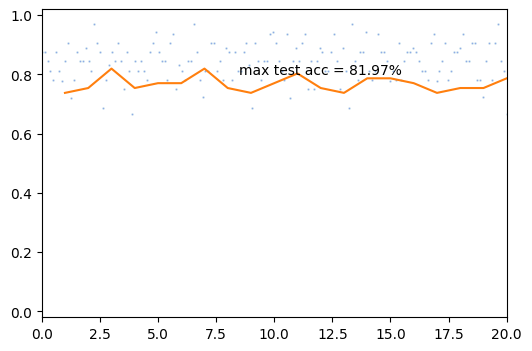

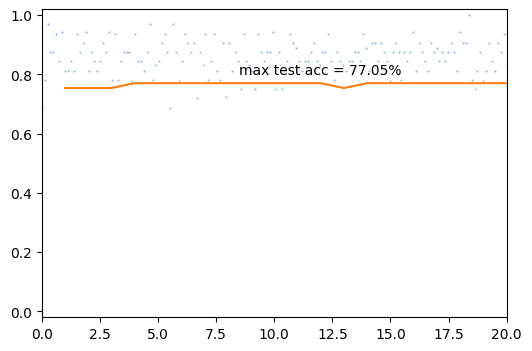

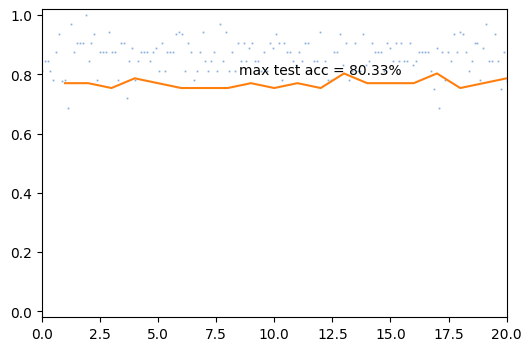

In [114]:
spheres_models = [
    create_model("linear_relu", num_features=3, num_classes=2, channel_size=2).to(device),
    create_model("linear_maxplus", num_features=3, num_classes=2, channel_size=2).to(device),
    create_model("linear_minplus", num_features=3, num_classes=2, channel_size=2).to(device),
]

for model in rings_models:
    model_ref = model.name.replace("_", "/")
    print(f"{model_ref} model has {count_parameters(model)} parameters")

loss = nn.CrossEntropyLoss()
epochs = 20

for model in heart_models:
    if model.name == "linear_relu":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_maxplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    elif model.name == "linear_minplus":
        optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2, weight_decay=0.01)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=2e-2,
            anneal_strategy="linear",
            pct_start=0.3,
            three_phase=True,
            final_div_factor=1000.0,
            div_factor=10.0,
            steps_per_epoch=len(heart_train),
            epochs=epochs,
        )
    else:
        raise RuntimeError(f"Unknown model ({model.name})")

    train(
        model,
        device,
        heart_train_loader,
        heart_test_loader,
        optimizer,
        scheduler,
        loss,
        epochs,
    )